In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import pandas as pd
from itertools import accumulate

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

In [2]:
def plot_proj(A,v,y,name=None):

    plt.scatter(A[:,0],A[:,1],label='data',c=y,cmap='viridis')
    
    #plt.plot(np.linspace(A[:,0].min(),A[:,0].max()),np.linspace(A[:,1].min(),A[:,1].max())*(v[1]/v[0]),color='black',linestyle='--',linewidth=1.5,label=name)   
    plt.plot(np.linspace(-1,1),np.linspace(-1,1)*(v[1]/v[0]),color='black',linestyle='--',linewidth=1.5,label=name)  
    # Run through all the data

    for i in range(len(A[:,0])-1):
        #data point 
        w=A[i,:]

        # projection
        cv = (np.dot(A[i,:],v))/np.dot(v,np.transpose(v))*v

        # line between data point and projection
        plt.plot([A[i,0],cv[0]],[A[i,1],cv[1]],'r--',linewidth=1.5)
    plt.plot([A[-1,0],cv[0]],[A[-1,1],cv[1]],'r--',linewidth=1.5,label='projections' )
    plt.legend()
    plt.show()

In [3]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000, factor=0.01, noise=0.05,random_state=0)
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y,random_state=0)

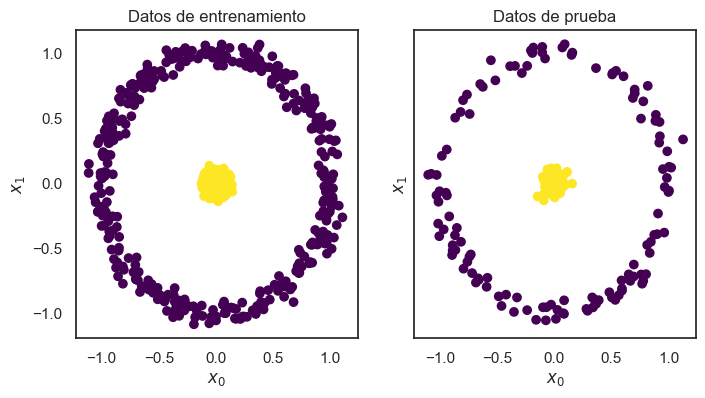

In [4]:
_, (train_ax, test_ax)= plt.subplots(ncols=2, sharex=True , sharey=True , figsize=(8,4))

train_ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='viridis')
train_ax.set_xlabel("$x_{0}$")
train_ax.set_ylabel("$x_{1}$")
train_ax.set_title("Datos de entrenamiento")

test_ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='viridis')
test_ax.set_xlabel("$x_{0}$")
test_ax.set_ylabel("$x_{1}$")
test_ax.set_title("Datos de prueba")
plt.show()

In [5]:
from sklearn.decomposition import PCA 

pca=PCA(n_components=2)

score_pca = pca.fit(X_train).transform(X_test)

In [6]:
pca

PCA(n_components=2)

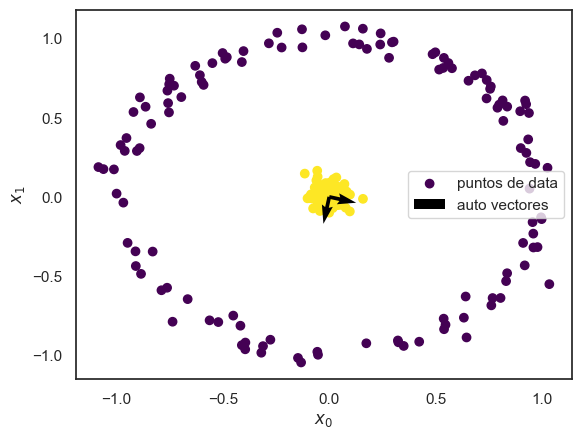

In [13]:
plt.scatter(score_pca[:,0], score_pca[:,1], c=y_test, label='puntos de data' , cmap='viridis')
plt.quiver([0,0],[0,0], pca.components_[0,:],pca.components_[1,:], label="auto vectores")
plt.xlabel("$x_{0}$")
plt.ylabel("$x_{1}$")
plt.legend(loc='center right')
plt.show()

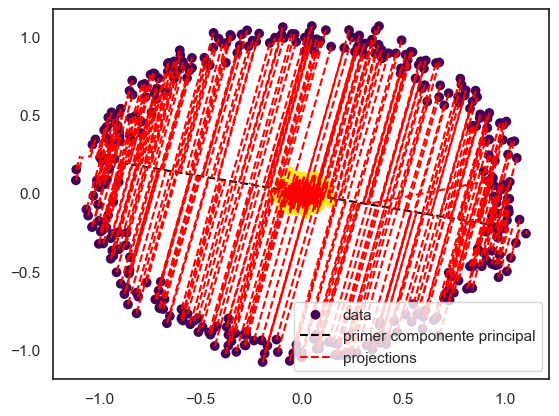

In [15]:
plot_proj(X_train,pca.components_[0,:],y_train,"primer componente principal")

Text(0.5, 1.0, 'proyección de los datos de prueba usando PCA')

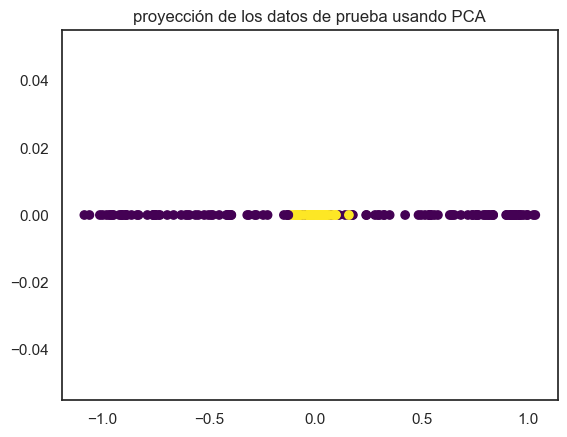

In [17]:
plt.scatter(score_pca [:,0], np.zeros(score_pca[:,0].shape[0]),c=y_test,cmap='viridis')
plt.title("proyección de los datos de prueba usando PCA")